In [1]:
import numpy as np 
import matplotlib.pyplot as plt

# FTCS method for solving the diffusion equation in one spatial dimension
For the diffusion equation, 
$$
\frac{\partial \phi}{\partial t} = D \frac{\partial ^2 \phi}{\partial x^2}
$$
the FCTS approach yields an approximate solution by forward integration
$$
\phi(x,t+h) = \phi(x,t) + h \frac{D}{a^2}\left[\phi(x+a,t) + \phi(x-a,t) - 2\phi(x,t)\right]
$$

In [ ]:
N = 100 
xmin, xmax = 0, 1
D = 4.25e-6 
h = 1e-4


xpoints = np.linspace(xmin, xmax, N)
tpoints = np.linspace(0, 0.1)


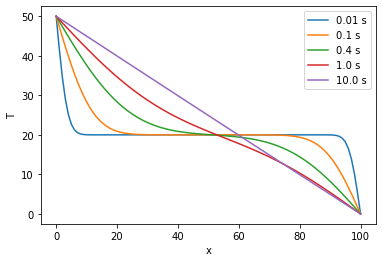

In [27]:
# Constants
L = 0.01      # Thickness of steel in meters
D = 4.25e-6   # Thermal diffusivity
N = 100       # Number of divisions in grid
a = L/N       # Grid spacing
h = 1e-4      # Time-step
epsilon = h/1000

Tlo = 0.0     # Low temperature in Celcius
Tmid = 20.0   # Intermediate temperature in Celcius
Thi = 50.0    # Hi temperature in Celcius

t1 = 0.01
t2 = 0.1
t3 = 0.4
t4 = 1.0
t5 = 10.0
tend = t5 + epsilon

# Create arrays
T = np.empty(N+1,float)
T[0] = Thi
T[N] = Tlo
T[1:N] = Tmid
Tp = np.empty(N+1,float)
Tp[0] = Thi
Tp[N] = Tlo

# Main loop
t = 0.0
c = h*D/(a*a)
while t<tend:
    
    for i in range(1,N):
        Tp[i] = T[i] + c*(T[i+1]+T[i-1]-2*T[i])
    T,Tp = Tp,T
    t += h

    # Make plots at the given times
    if abs(t-t1)<epsilon:
        plt.plot(T, label='0.01 s')
    if abs(t-t2)<epsilon:
        plt.plot(T, label='0.1 s')
    if abs(t-t3)<epsilon:
        plt.plot(T, label='0.4 s')
    if abs(t-t4)<epsilon:
        plt.plot(T, label='1.0 s')
    if abs(t-t5)<epsilon:
        plt.plot(T, label='10.0 s')

plt.xlabel("x")
plt.ylabel("T")
plt.legend(loc='best')
plt.show()


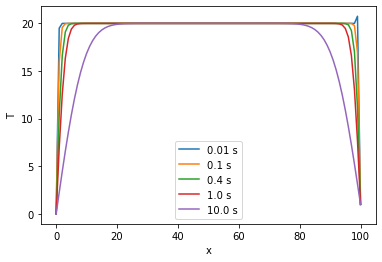

In [46]:
def fcts_step(p, h, D, a, boundary):
    ''' 
    p = array 
    h = time step size 
    D = diffusion constant 
    a = grid spacing
    b = boundary condition array 
    '''
    N,c = len(p), h*D/(a*a)
    f = np.empty(N)
    f[1:-1] = p[1:-1] + c*(p[2:] + p[:-2] - 2*p[1:-1])
    f[0], f[-1] = boundary[0], boundary[1]
    return f

# Constants
L = 20      # Thickness of steel in meters
D = 0.1     # Thermal diffusivity
N = 100       # Number of divisions in grid
a = L/N       # Grid spacing
h = 0.01      # Time-step
epsilon = h/1000

Tlo = 0.0     # Low temperature in Celcius
Tmid = 20.0   # Intermediate temperature in Celcius
Thi = 50.0    # Hi temperature in Celcius

t1 = 0.01
t2 = 0.1
t3 = 0.4
t4 = 1.0
t5 = 10.0
tend = t5 + epsilon

#Initial condition with constant Dirichlet boundary conditions imposed
T = np.linspace(0., L, N+1)
T[0], T[-1] = Tlo, Thi
T[1:-1] = Tmid
t=0

while t<tend:
    
    Tnew = fcts_step(T, h, D, a, [Tlo, Tmid])
    T, Tnew = Tnew, T
    # print(T)
    t += h

    # Make plots at the given times
    if abs(t-t1)<epsilon:
        plt.plot(T, label='0.01 s')
    if abs(t-t2)<epsilon:
        plt.plot(T, label='0.1 s')
    if abs(t-t3)<epsilon:
        plt.plot(T, label='0.4 s')
    if abs(t-t4)<epsilon:
        plt.plot(T, label='1.0 s')
    if abs(t-t5)<epsilon:
        plt.plot(T, label='10.0 s')

plt.xlabel("x")
plt.ylabel("T")
plt.legend(loc='best')
plt.show()


# Exercise 8.3: Thermal Diffusion in the Earth's Crust
Suppose the mean daily temperature at a particular point on the surface varies as: 
$$
T_0(t) = A + B \sin \left(\frac{2\pi t}{\tau}\right)
$$
where $\tau = 365\ \text{days}$, $A = 10^{\circ}C$, and $B = 12^{\circ}C$. At a depth of $20\ \text{m}$ below, the temperature is averaged and ironed out to an approximate 
$11^{\circ}C$. The thermal diffusivity of the Earth's crust varies from place to place but we will treat it as $D = 0.1\ \text{m}^2\text{day}^{-1}$.

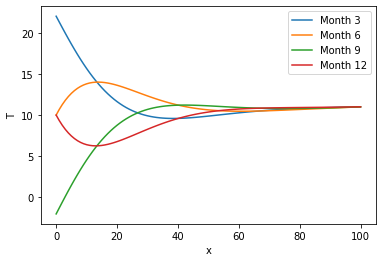

In [49]:
def fcts_step(p, h, D, a, boundary):
    ''' 
    p = array 
    h = time step size 
    D = diffusion constant 
    a = grid spacing
    b = boundary condition array 
    '''
    N,c = len(p), h*D/(a*a)
    f = np.empty(N)
    f[1:-1] = p[1:-1] + c*(p[2:] + p[:-2] - 2*p[1:-1])
    f[0], f[-1] = boundary[0], boundary[1]
    return f

def boundary_temp(A,B, t, tau):
    return A + B*np.sin((2*np.pi*t)/tau)


# Physical Constants
L = 20          # Depth in meters 
A, B = 10, 12   # Constants A and B in the problem 
tau = 365       
D = 0.1 
T_end = 11      # Temperature at bottom depth, in Celsius

#FCTS constants
N = 100         # Grid divisions 
h = 0.01         # Time steps
epsilon = h/1000

t1 = 365*9 
t2 = 365*9.25 
t3 = 365*9.5 
t4 = 365*9.75 
t5 = 365*10 
tend = t5 + epsilon 

#Initial condition with constant Dirichlet boundary conditions imposed
T = np.linspace(0., L, N+1)
T[-1] = T_end
T[1:-1] = 10
t=0

while t<tend:
    T_start = boundary_temp(A,B, t, tau)
    # print(T_start)
    Tnew = fcts_step(T, h, D, a, [T_start, T_end])
    T, Tnew = Tnew, T
    # print(T[1])
    t += h

    # Make plots at the given times
    if abs(t-t2)<epsilon:
        plt.plot(T, label='Month 3')
    if abs(t-t3)<epsilon:
        plt.plot(T, label='Month 6')
    if abs(t-t4)<epsilon:
        plt.plot(T, label='Month 9')
    if abs(t-t5)<epsilon:
        plt.plot(T, label='Month 12')

plt.xlabel("x")
plt.ylabel("T")
plt.legend(loc='best')
plt.show()
